In [1234]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
pd.get_option("display.max_columns")

20

In [1235]:
train = pd.read_csv('train.csv')
submission = pd.read_csv('test.csv')

submission_ids = pd.Series(submission["PassengerId"])

In [1236]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1237]:
train.shape

(891, 12)

In [1238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory data analysis

## Some features might not add value to the prediction

In [1239]:
train.drop(['Name', 'PassengerId'], inplace = True, axis = 1)

In [1240]:
submission.drop(['Name', 'PassengerId'], inplace = True, axis = 1)

In [1241]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


There are some features that can seem important. However, without sufficient knowledge they are not of a good use.

In [1242]:
train.drop(['Ticket'], inplace = True, axis = 1)
submission.drop(['Ticket'], inplace = True, axis = 1)

In [1243]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Missing data

In [1244]:
train.isnull().sum() / len(train)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

### Cabin 77% missing
77% of the cabin feature is missing! Even if we tried to replace the missing data, it would not give accurate results because replacing missing data with a value is an educated guess. We are imposing what we think might be true.

In [1245]:
train.drop(['Cabin'], inplace = True, axis = 1)
submission.drop(['Cabin'], inplace = True, axis = 1)

In [1246]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Age 20% missing and it is important

In [1247]:
train[['Age']] = train[['Age']].fillna(train[['Age']].mean())
submission[['Age']] = submission[['Age']].fillna(submission[['Age']].mean())

In [1248]:
train.isnull().sum() / len(train)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

### When we see embarked we will find that it is categorical so how will we replace it? mean? median? ay 7aga

<ol>
    <li> We can remove the rows(which are 2 here; a very low number)</li>
    <li> We can think of something else </li>
</ol>

<AxesSubplot:>

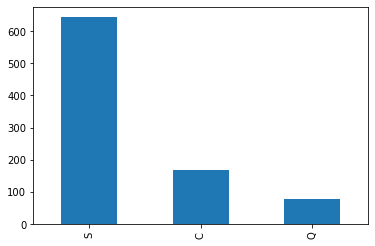

In [1249]:
train['Embarked'].value_counts().plot(kind = 'bar')
#plt.show()

In [1250]:
train[['Embarked']] = train[['Embarked']].fillna('S')
submission[['Embarked']] = submission[['Embarked']].fillna('S')

In [1251]:
train.isnull().sum() / len(train)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

# Categorical data

An easy tutorial using different methods: https://towardsdatascience.com/ways-to-handle-categorical-data-before-train-ml-models-with-implementation-ffc213dc84ec

In [1252]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Label encoding

In [1253]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1254]:
"""from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])"""

"from sklearn import preprocessing\nlabel_encoder = preprocessing.LabelEncoder()\ntrain['Embarked'] = label_encoder.fit_transform(train['Embarked'])"

In [1255]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


One hot encoding

In [1256]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'])

In [1257]:
submission = pd.get_dummies(submission, columns=['Sex', 'Embarked'])

In [1258]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


# Normalization

In [1259]:
y = train['Survived']
train.drop(['Survived'], inplace = True, axis = 1)

In [1260]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [1261]:
train = (train-train.mean())/train.std()
submission = (submission - submission.mean()) / submission.std()

In [1262]:
"""train =(train-train.min())/(train.max()-train.min())"""
"""submission =(submission-submission.min())/(submission.max()-submission.min())"""

'submission =(submission-submission.min())/(submission.max()-submission.min())'

# Congrats, now we can use a model to predict

In [1263]:
train.shape

(891, 10)

In [1264]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

In [1265]:
x_train.shape

(712, 10)

In [1266]:
y_train.shape

(712,)

In [1267]:
x_test.shape

(179, 10)

## Create the model

In [1268]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [1269]:
#model.summary()

In [1270]:
model.compile(loss = 'BinaryCrossentropy',
             optimizer = 'adam',
             metrics = ['acc'])

In [1271]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
23/23 [==============================] - 1s 7ms/step - loss: 0.6596 - acc: 0.6236
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6246 - acc: 0.6236
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5923 - acc: 0.6236
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5637 - acc: 0.6236
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5461 - acc: 0.6236
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5373 - acc: 0.6419
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5295 - acc: 0.8020
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5220 - acc: 0.8006
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5168 - acc: 0.8132
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5119 - acc: 0.8146
Epoch 11/100
23/23 [==============================] - 0s 5m

23/23 [==============================] - 0s 6ms/step - loss: 0.3946 - acc: 0.8455
Epoch 88/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3911 - acc: 0.8525
Epoch 89/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3916 - acc: 0.8483
Epoch 90/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3923 - acc: 0.8469
Epoch 91/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3900 - acc: 0.8497
Epoch 92/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3886 - acc: 0.8511
Epoch 93/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3869 - acc: 0.8511
Epoch 94/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3856 - acc: 0.8539
Epoch 95/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3894 - acc: 0.8539
Epoch 96/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3912 - acc: 0.8469
Epoch 97/100
23/23 [==============================] - 0s 5ms/st

In [1272]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.4607 - acc: 0.8101


[0.46071404218673706, 0.8100558519363403]

In [1273]:
submission.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.872436,0.334592,-0.498872,-0.399769,-0.497213,-0.755024,0.755024,-0.567462,2.840354,-1.349059
1,0.872436,1.323944,0.616254,-0.399769,-0.512045,1.321292,-1.321292,-0.567462,-0.351227,0.739484
2,-0.315441,2.511166,-0.498872,-0.399769,-0.463974,-0.755024,0.755024,-0.567462,2.840354,-1.349059
3,0.872436,-0.259019,-0.498872,-0.399769,-0.482308,-0.755024,0.755024,-0.567462,-0.351227,0.739484
4,0.872436,-0.654760,0.616254,0.619154,-0.417469,1.321292,-1.321292,-0.567462,-0.351227,0.739484


In [1274]:
submission_preds = (model.predict(submission) > 0.5).astype("int32")

In [1275]:
submission_preds = submission_preds.reshape(-1)

In [1276]:
df = pd.DataFrame({"PassengerId":submission_ids.values,
                  "Survived": submission_preds})

In [1277]:
df.to_csv("submission.csv", index=False)